In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import xgboost as xgb

from scipy import stats

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster

from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg

from skforecast.utils import load_forecaster

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras import optimizers,callbacks
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout, MultiHeadAttention, GlobalAveragePooling1D, Input

# Calculo de metricas
# ==============================================================================
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from sklearn import metrics

# Configuración warnings
# ==============================================================================
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
warnings.filterwarnings("ignore")
# warnings.filterwarnings('ignore')

In [2]:
# Common code for display result
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

In [3]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE: {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE: {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2: {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [4]:
# Carga de datos
# ==============================================================================
folder = "C:\\Users\\Martinejo\\Documents\\UMH\\INVESTIGACION\\MARGARITA_SALAS\\Sistema_Riego\\"
parametro = 'eto'
output=parametro
inputs_sen = [
          'fecha', 'eto','viento_med','precip','temp_med','hr_med','rad_med'
          ]
inputs_sat = [
          'date', 'ndvi_mean','ndwi_mean','ndmi_mean','gndvi_mean','evi_mean','evi2_mean','savi_mean'
          ]
usecols_sen = inputs_sen.copy()
usecols_sat = inputs_sat.copy()

datos_sen = pd.read_csv(folder + "agroclimatology_parcel_1" + ".csv",sep=',', usecols=usecols_sen)
datos_sat = pd.read_csv(folder + "teledeteccion_sentinel2_parcel_1" + ".csv",sep=',', usecols=usecols_sat)

datos_sen = datos_sen.drop_duplicates()
datos_sat = datos_sat.drop_duplicates()

#datos_sat["eto"] = 0
variable=[]
flag = 0

for k in range(len(datos_sat)):
    for q in range(len(datos_sen)):
        if(datos_sat.iloc[k].loc["date"] == datos_sen.iloc[q].loc["fecha"]):
            #print(datos_sen.iloc[q].loc["eto"])
            flag = 1
            variable.append(datos_sen.iloc[q].loc["eto"])
            #datos_sat.iloc[k].loc["eto"] = variable
            #print(variable)
    if (flag == 0):
        print(f"La fecha {datos_sat.iloc[k].loc['date']} no la tienen los sensores")
    flag = 0        
            
datos_sat["eto"] = variable

print(datos_sat)

           date  ndvi_mean  ndwi_mean  ndmi_mean  gndvi_mean  evi_mean  \
0    2022-01-10   0.352500  -0.477254  -0.045895    0.477254  0.197024   
1    2022-01-11   0.352500  -0.477254  -0.045895    0.477254  0.197024   
2    2022-01-15   0.373885  -0.481882  -0.052732    0.481882  0.227659   
3    2022-01-16   0.373885  -0.481882  -0.052732    0.481882  0.227659   
4    2022-01-20   0.376884  -0.461015  -0.017178    0.461015  0.218201   
..          ...        ...        ...        ...         ...       ...   
231  2023-08-13   0.364463  -0.435672   0.014997    0.435672  0.272539   
232  2023-08-14   0.364463  -0.435672   0.014997    0.435672  0.272539   
233  2023-08-18   0.385314  -0.467312   0.018224    0.467312  0.294597   
234  2023-08-19   0.385314  -0.467312   0.018224    0.467312  0.294597   
235  2023-08-23   0.367847  -0.444959   0.014626    0.444959  0.279567   

     evi2_mean  savi_mean   eto  
0     0.212094   0.220751  3.11  
1     0.212094   0.220751  0.58  
2     0.2

In [5]:
print(len(variable))

236


In [6]:
datos = datos_sat.copy()

In [7]:
datos["eto"].isna().sum()

0

In [8]:
while datos["eto"].isna().sum() > 0:
    datos = datos.fillna(value=datos.shift(1))
    datos["eto"].isna().sum()
datos["eto"].isna().sum()

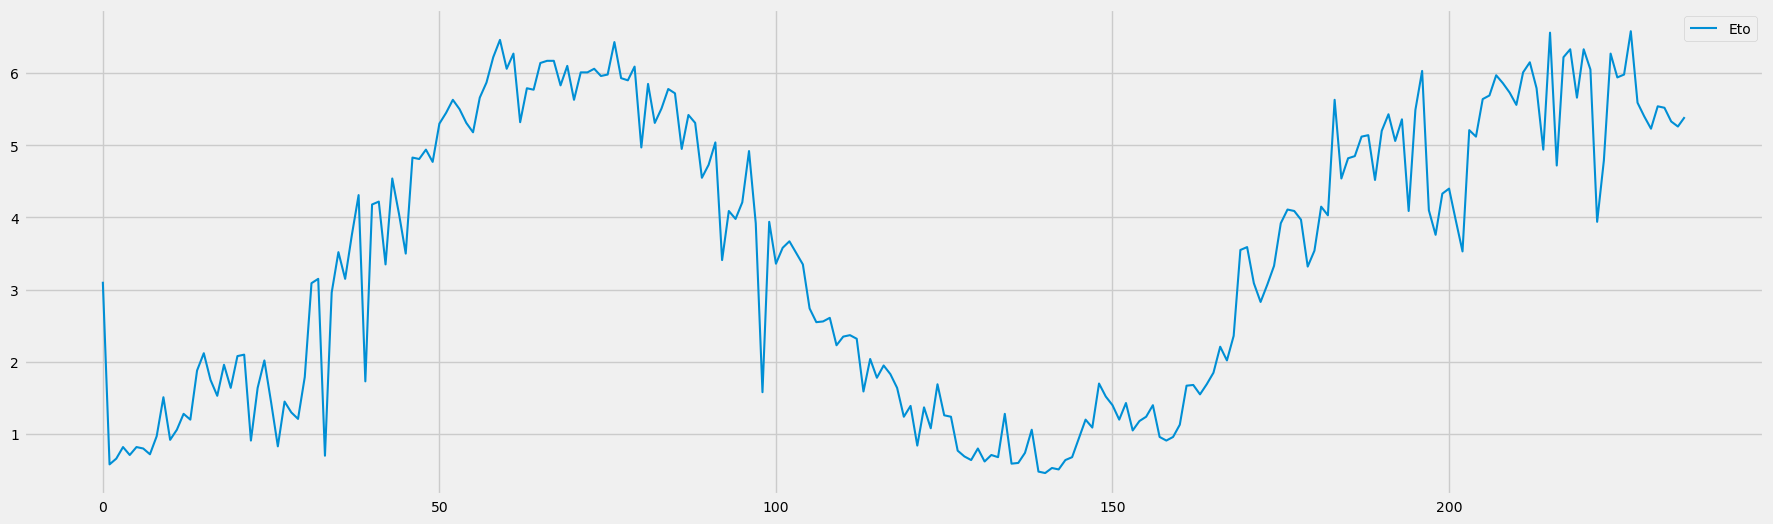

In [9]:
fig, ax = plt.subplots(figsize=(20, 6))
datos['eto'].plot(ax=ax, label='Eto')
#datos['ambiente'].plot(ax=ax, label='Ambiente')
#datos['nivel'].plot(ax=ax, label='Nivel')
ax.legend();

#COMENTAR ESTA LISTA PARA HACER EL ANÁLISIS CON LA PROPIA SERIE, Y NO CON LAS DIFERENCIAS
#datos = datos.diff().dropna()

## MODELADO

In [10]:
datos = datos.drop(columns=["date"])

In [11]:
def rmsle_cv(model,x,y):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(x.values)
    rmse= cross_val_score(model, x.values, y, scoring=None, cv = kf)
    return(rmse)

[-1.75096352 -6.19337891 -2.82912355  0.25272831 -4.20076503]


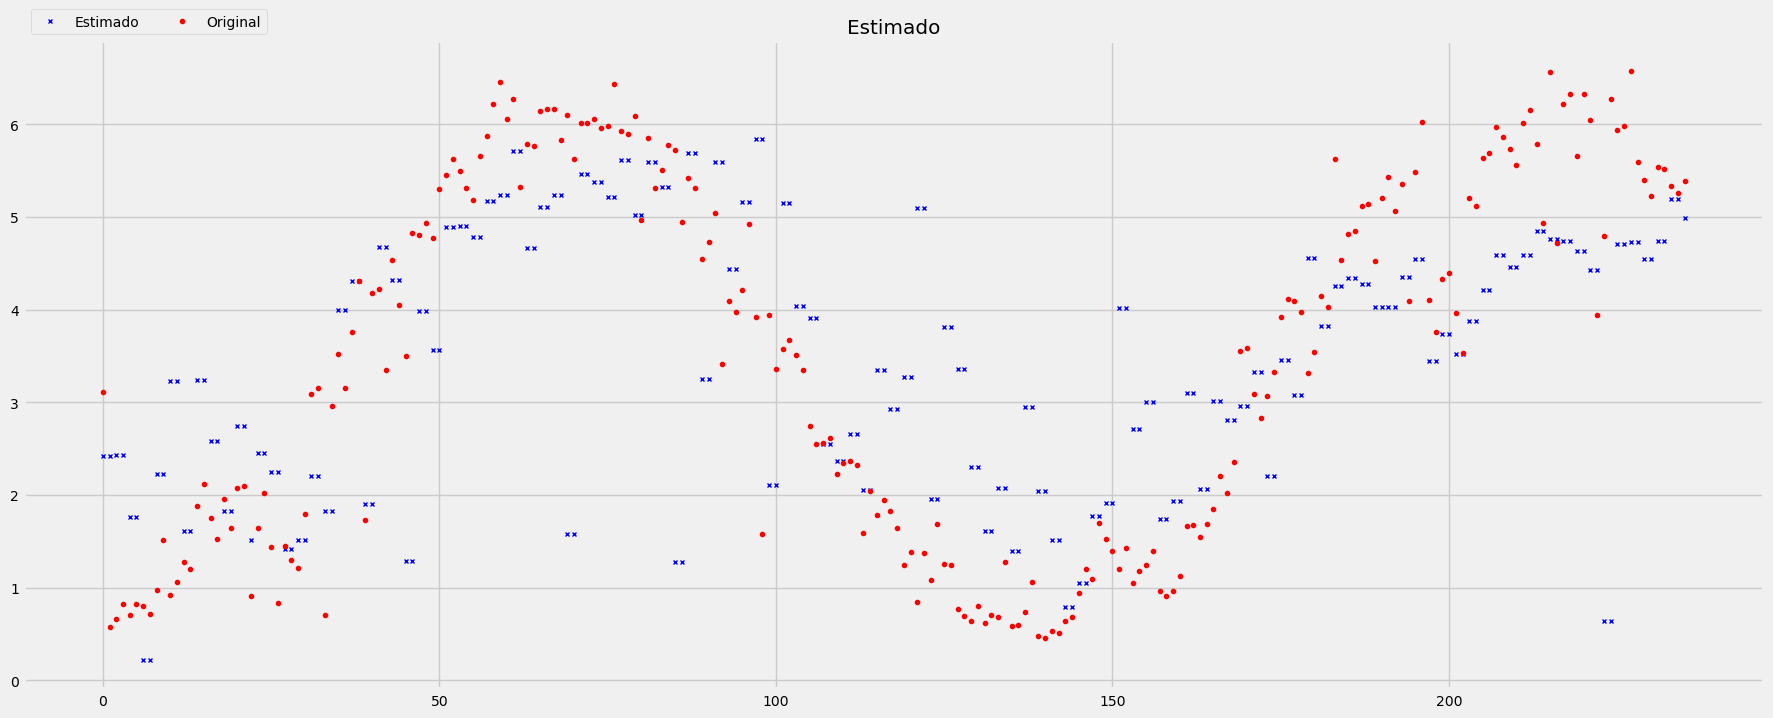

MAE = 0.863326


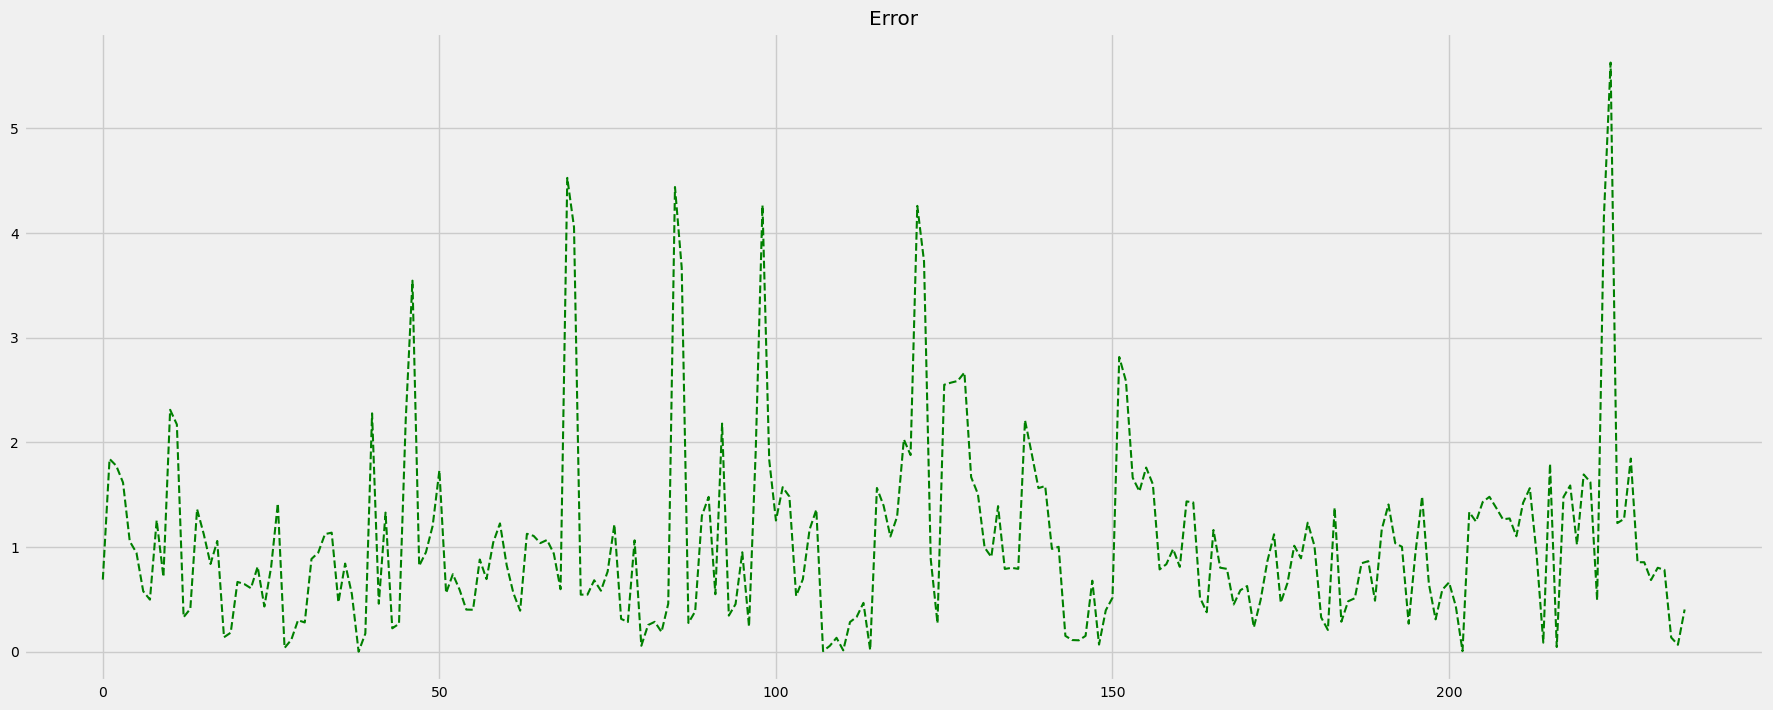

Lasso metrics: MAE = 1.0620 R2 = (0.4982)

[ -81.28387509   -5.10312631    1.6801981     5.10312631   -0.50263569
 -129.95557695  239.12749138]


In [12]:
y_train = datos["eto"].loc[:].values
datos_train = datos.drop(columns=['eto'])

lm = linear_model.LinearRegression()
model = lm.fit(datos_train,y_train)

res_lineal = rmsle_cv(lm,datos_train,y_train)
print(res_lineal)

plt.figure(figsize=(20,8))

#plt.title('Y_predict')
l = plt.plot(lm.predict(datos_train), 'o', color='blue', label="Estimado", marker='x')
plt.setp(l, markersize=3)

plt.title('Estimado')
q = plt.plot(y_train, 'o', color='red', label="Original")
plt.setp(q, markersize=3)
category_names = ['Estimado', 'Original']
legend = plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
plt.show()

MAE_lineal = median_absolute_error(y_train, lm.predict(datos_train))
print("MAE = %f" % MAE_lineal)

errores_Lineal = abs(y_train-lm.predict(datos_train))

plt.figure(figsize=(20,8))
plt.title('Error')
plt.plot(errores_Lineal, 'r--', color='green')
plt.show()

print("Lasso metrics: MAE = {:.4f} R2 = ({:.4f})\n".format(np.mean(errores_Lineal), r2_score(y_train, lm.predict(datos_train))))

print(lm.coef_)

##EL MODELO ES MUY BUENO POR T-1, SI QUITAMOS ESTA VARIABLE EMPEORA A 0.3 APROX

In [13]:
import statsmodels.api as sm

#datos_train = datos_train.drop(columns=["evi_mean"])
#datos_train = datos_train.drop(columns=["ndmi_mean"])

data_train = sm.add_constant(datos_train)
est = sm.OLS(y_train, data_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     37.89
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           8.77e-32
Time:                        18:02:48   Log-Likelihood:                -412.92
No. Observations:                 236   AIC:                             839.8
Df Residuals:                     229   BIC:                             864.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1539      0.325      3.551      0.0

In [14]:
def ML_algorithms(algo):
    if algo == 'KNN':
      model = KNeighborsRegressor(9, weights='distance') # RDregresor
      return model

    if algo=="MLP":
      #(64, 32)	0.01	200.0
      model = MLPRegressor(hidden_layer_sizes=(32,32), learning_rate_init=0.01, max_iter=400, random_state=1)
      return model

    if algo=='DT':
      model = DecisionTreeRegressor(max_depth=16, min_samples_split=2,random_state=0)
      return model

    if algo=="RFR":
      #antes 16 y 4
      model =  RandomForestRegressor(random_state=0, n_estimators=8, min_samples_split=16)
      return model
  
    if algo=="LR":
        #antes 16 y 4
        model =  linear_model.LinearRegression()
        return model

In [15]:
algoritmos = ['KNN', 'MLP', 'DT', 'RFR','LR']
cv_scores = pd.DataFrame()
dfe=datos.copy()


inputs_sen = [
          'viento_med','precip','temp_med','hr_med','rad_med'
          ]

inputs_sat = [
          'ndvi_mean','ndwi_mean','ndmi_mean','gndvi_mean','evi_mean','evi2_mean','savi_mean'
          ]

for algo in algoritmos:

    print("Algoritmo", algo)
    dfwork = dfe.copy()

    x = dfwork[inputs_sat].values
    y = dfwork[output].values
    
    lm = ML_algorithms(algo)
      #model = lm.fit(x,y)
    kf = KFold(5, shuffle=True, random_state=42)
    icv=0
    acc_score = []
    for train, test in kf.split(x):
      X_train, X_test, y_train, y_test = x[train], x[test], y[train], y[test]
      model = lm.fit(X_train,y_train)
      ypred = model.predict(X_test)

      r2 = r2_score(y_test, ypred)
      mae = mean_absolute_error(y_test, ypred)
      mse = mean_squared_error(y_test, ypred)
      icv = icv + 1

      result = {"Algoritmh": algo, "cv":icv, "r2" : r2, 'MAE':mae, "MSE": mse}
      cv_scores = cv_scores.append(result, ignore_index=True)

r = cv_scores.groupby(['Algoritmh']).mean()
print(r)

Algoritmo KNN
Algoritmo MLP
Algoritmo DT
Algoritmo RFR
Algoritmo LR
            cv        r2       MAE       MSE
Algoritmh                                   
DT         3.0  0.829540  0.521508  0.631833
KNN        3.0  0.834067  0.514198  0.611943
LR         3.0  0.451833  1.087990  2.033914
MLP        3.0  0.166205  1.560004  3.087748
RFR        3.0  0.685992  0.841459  1.176762


In [16]:
entreno = 5

datos_entreno = datos.iloc[:-entreno] # PARA TENER UNA COPIA DEL ORIGINAL Y MODIFICAR LA COPIA

X_train = datos[inputs_sat].iloc[:-entreno]
y_train = datos[output].iloc[:-entreno]
X_test = datos[inputs_sat].iloc[-entreno:]
y_test = datos[output].iloc[-entreno:]

In [17]:
X_train.head()

,ndvi_mean,ndwi_mean,ndmi_mean,gndvi_mean,evi_mean,evi2_mean,savi_mean
0,0.352500,-0.477254,-0.045895,0.477254,0.197024,0.212094,0.220751
1,0.352500,-0.477254,-0.045895,0.477254,0.197024,0.212094,0.220751
2,0.373885,-0.481882,-0.052732,0.481882,0.227659,0.230336,0.237910
3,0.373885,-0.481882,-0.052732,0.481882,0.227659,0.230336,0.237910
4,0.376884,-0.461015,-0.017178,0.461015,0.218201,0.221853,0.232132


In [18]:
y_train.tail()

226    5.98
227    6.58
228    5.59
229    5.40
230    5.23
Name: eto, dtype: float64

In [19]:
X_train.describe()

,ndvi_mean,ndwi_mean,ndmi_mean,gndvi_mean,evi_mean,evi2_mean,savi_mean
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,0.304579,-0.354847,0.060957,0.354847,0.246193,0.220770,0.218005
std,0.152224,0.176295,0.132151,0.176295,0.189201,0.112290,0.109648
min,-0.092726,-0.603984,-0.129408,-0.128391,-1.008412,-0.166043,-0.115580
25%,0.237704,-0.489720,-0.029510,0.289348,0.178219,0.165270,0.166219
50%,0.331793,-0.414920,0.045393,0.414920,0.264244,0.237357,0.234029
75%,0.424576,-0.289348,0.096106,0.489720,0.322682,0.320288,0.316128
max,0.513242,0.128391,0.621039,0.603984,1.077643,0.384136,0.371622


In [20]:
y_train.describe()

count    231.000000
mean       3.428268
std        1.969344
min        0.460000
25%        1.480000
50%        3.540000
75%        5.315000
max        6.580000
Name: eto, dtype: float64

In [21]:
#model_LR =  linear_model.LinearRegression().fit(X_train,y_train)
model_LR = KNeighborsRegressor(10,weights='distance').fit(X_train,y_train)
#model_LR = Lasso(alpha=1.0).fit(X_train,y_train) #LASSO y RIDGE muy malos
#model_LR = Ridge(alpha=1.0).fit(X_train,y_train) #LASSO y RIDGE muy malos
#model_LR = SVR(kernel='linear', C=1.0, epsilon=0.1).fit(X_train,y_train)

ypred = model_LR.predict(X_test)

predicciones = pd.DataFrame() #ESTO PARA CREAR UN DATAFRAME SOLO CON LAS PREDICCIONES, PARA PINTAR LUEGO
predicciones_fecha = pd.DataFrame() #ESTO PARA CREAR UN DATAFRAME SOLO CON LAS PREDICCIONES, PARA PINTAR LUEGO

predicciones["pred"] = ypred

r2 = r2_score(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)

predicciones_fecha = X_test.copy()
predicciones_fecha["eto"] = predicciones["pred"].values

print(predicciones_fecha)

     ndvi_mean  ndwi_mean  ndmi_mean  gndvi_mean  evi_mean  evi2_mean  \
231   0.364463  -0.435672   0.014997    0.435672  0.272539   0.282272   
232   0.364463  -0.435672   0.014997    0.435672  0.272539   0.282272   
233   0.385314  -0.467312   0.018224    0.467312  0.294597   0.304248   
234   0.385314  -0.467312   0.018224    0.467312  0.294597   0.304248   
235   0.367847  -0.444959   0.014626    0.444959  0.279567   0.290122   

     savi_mean       eto  
231   0.274152  5.866936  
232   0.274152  5.866936  
233   0.293762  5.768268  
234   0.293762  5.768268  
235   0.280229  5.900820  


Evaluation metric results:-
MSE: 0.18772056822563515
MAE: 0.4262453239807506
RMSE: 0.4332673172830316
MAPE: 7.909830511038626
R2: -15.105059044752508



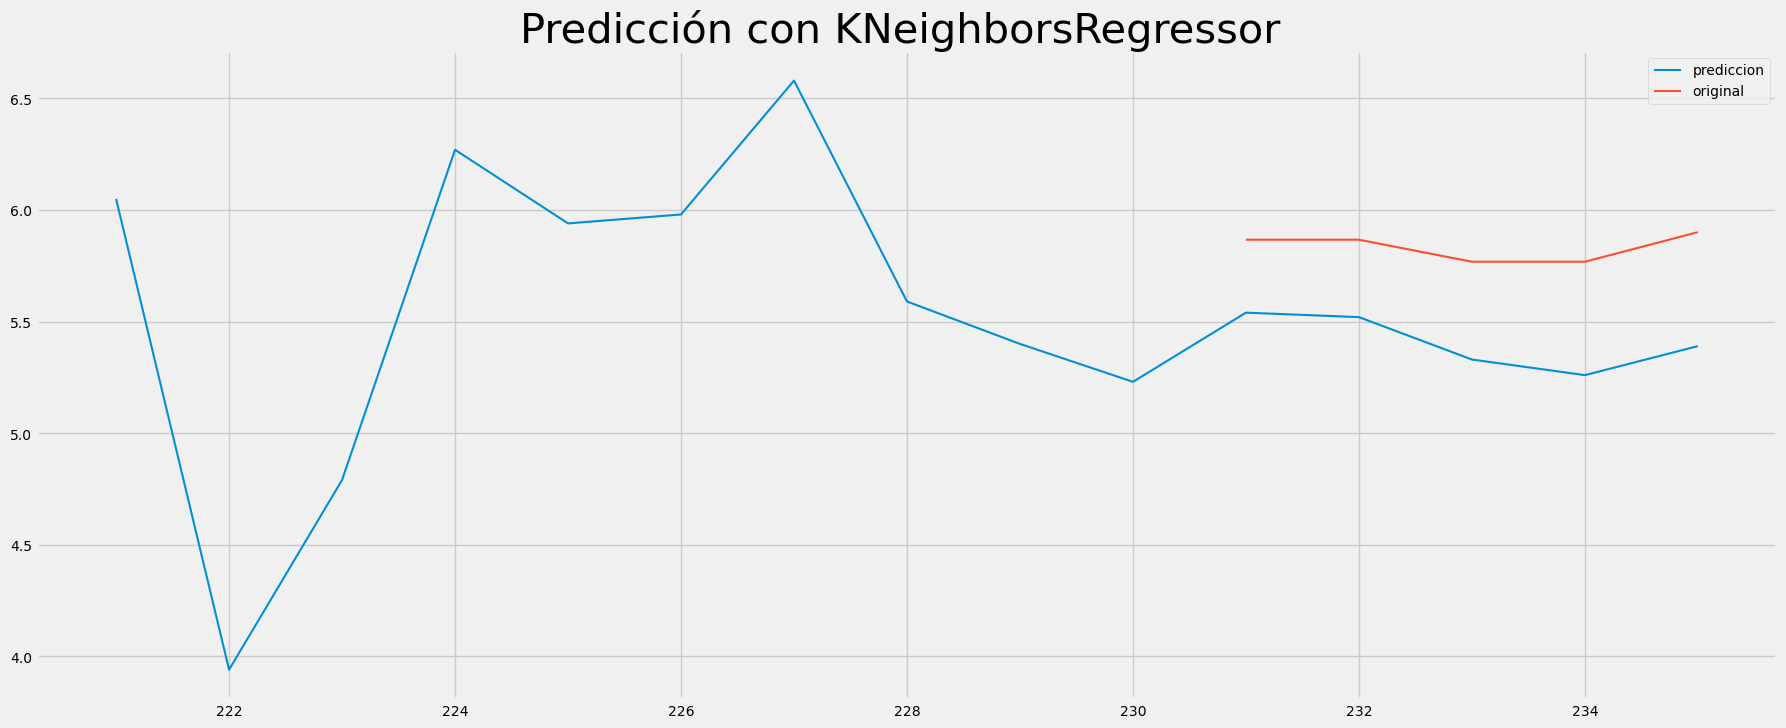

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("Predicción con KNeighborsRegressor ", fontsize=30);
#df_train['temperatura'].plot(ax=ax, label='train')
datos["eto"].tail(10+entreno).plot(ax=ax, label='prediccion')
predicciones_fecha["eto"].plot(ax=ax, label='original')
ax.legend();

evaluacion_metrica(y_true = y_test,y_pred = predicciones_fecha["eto"])


In [23]:
def KNN(nestimators):
      model = KNeighborsRegressor(nestimators,weights='distance') # RDregresor
      return model

def MLP(layer=(32,32), lr = 0.001, max_iter=400):
      model =  MLPRegressor(hidden_layer_sizes=layer, learning_rate_init=lr, max_iter=max_iter, random_state=1)
      return model

def DT(depth, mss):
  model = DecisionTreeRegressor(max_depth=depth, min_samples_split=mss,random_state=0)
  return model

def RFR(nestimators=8, mss=16):
  model =  RandomForestRegressor(random_state=0, n_estimators=nestimators, min_samples_split=mss)
  return model

In [24]:
dfe=datos.copy()

layers = [(32,32) , (64,64), (64,32), (32,64), (32,16)] #MLP
lrs = [0.1, 0.01, 0.001, 0.0001] #MLP
max_iters = [10, 50, 100, 200, 400, 800] #MLP

max_depth = [4,8,10,16,30,60,120] #DT
mss = [2,4,8,16,32,64] #DT , RFR
nstimator=[1,2,3,4,5,6,7,8,9,10] # RFR, KNN


model_loop = layers
model_loop2 = lrs

best_model = None
best_model_I = 0
best_score = 0
cv_scores_DT = pd.DataFrame()
cv_scores_KNN = pd.DataFrame()
cv_scores_best = pd.DataFrame()

#================================ DT ==================================

for ns in max_depth:

    for ms in mss:

        dfwork = dfe.copy()

        x = dfwork[inputs_sat].values
        y = dfwork[output].values

        model = DT(ns, ms)
        cv = KFold(n_splits=5, random_state=1, shuffle=True)
        scores = cross_val_score(model, x, y, cv=cv, n_jobs=-1)

        if (scores.mean() > best_score):
            best_score = scores.mean()
            best_model = model
            result = {"Parametro1": ns, "Parametro2": ms, 'score':scores.mean()}
            
cv_scores_DT = cv_scores_DT.append(result, ignore_index=True)
print("=============== DT =================")
print(cv_scores_DT.sort_values('score', ascending=False))

param_DT=[cv_scores_DT["Parametro1"].median(), cv_scores_DT["Parametro2"].median()]


#================================ KNN ==================================

best_score=0

for nstim in nstimator:

    dfwork = dfe.copy()

    x = dfwork[inputs_sat].values
    y = dfwork[output].values

    model = KNN(nstim)
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(model, x, y, cv=cv, n_jobs=-1)

    if (scores.mean() > best_score):
        best_score = scores.mean()
        best_model = model
        result = {"Parametro1": nstim, 'score':scores.mean()}

cv_scores_KNN = cv_scores_KNN.append(result, ignore_index=True)

print("=============== KNN =================")
print(cv_scores_KNN.sort_values('score', ascending=False))

param_KNN=[cv_scores_KNN["Parametro1"].median()]

=============== DT =================
   Parametro1  Parametro2     score
0        16.0         2.0  0.731153
=============== KNN =================
   Parametro1     score
0         9.0  0.797239


In [26]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [27]:
# Crear un modelo de regresión Gradient Boosting con XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror')

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train,y_train)

# Obtener los mejores hiperparámetros y el modelo optimizado
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", best_params)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE) con mejores hiperparámetros: {mse}")



Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Error Cuadrático Medio (MSE) con mejores hiperparámetros: 0.5224387865201852


Evaluation metric results:-
MSE: 0.5224387865201852
MAE: 0.7146906929016111
RMSE: 0.7227992712504525
MAPE: 13.180825138117253
R2: -43.821447024724215



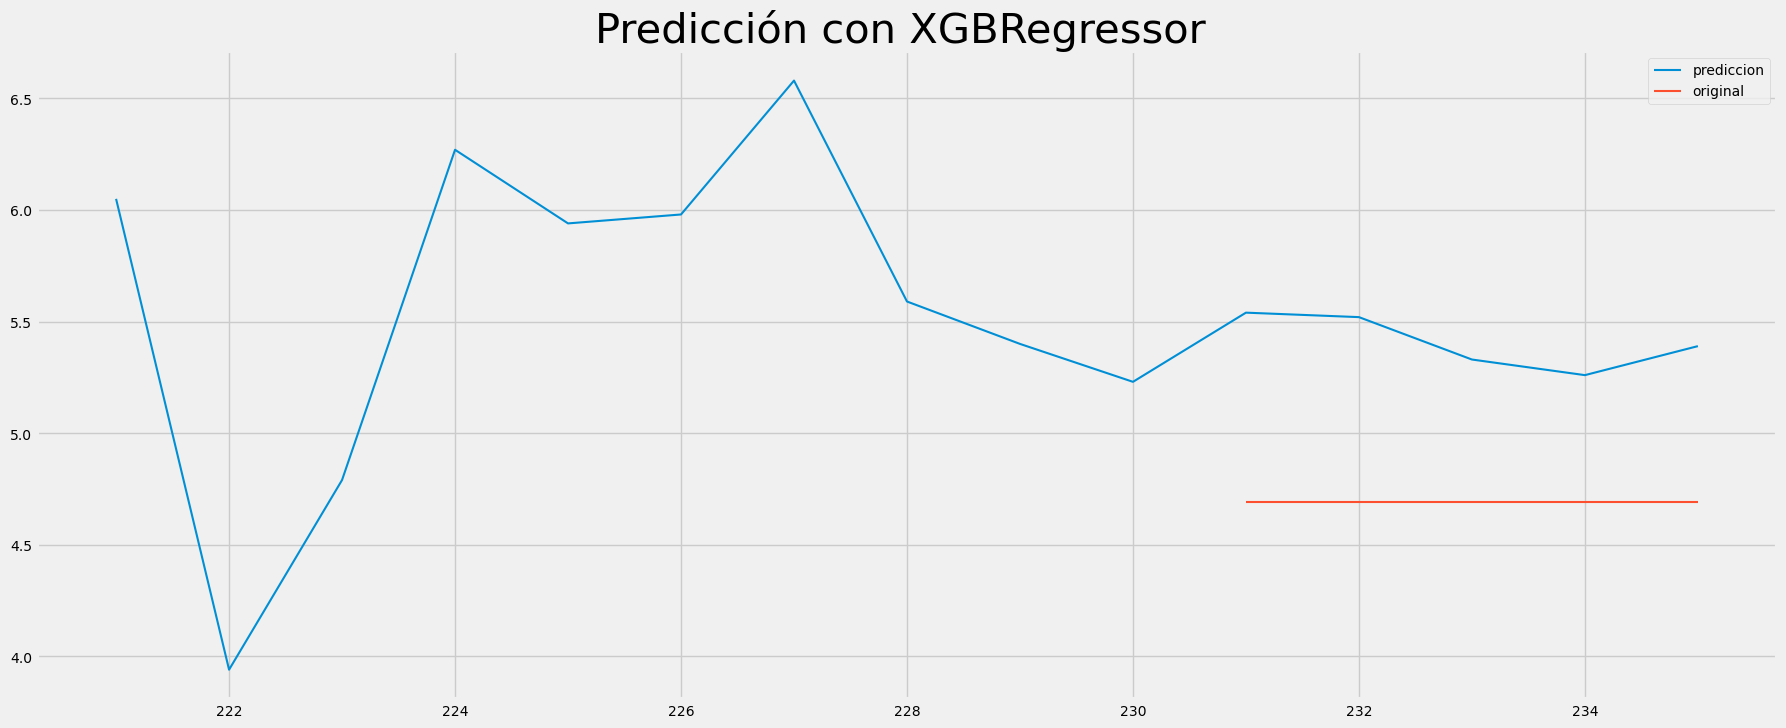

In [28]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

predicciones["pred"] = y_pred
predicciones_fecha = X_test.copy()
predicciones_fecha["eto"] = predicciones["pred"].values

fig, ax = plt.subplots(figsize=(20, 8))
plt.title("Predicción con XGBRegressor ", fontsize=30);
#df_train['temperatura'].plot(ax=ax, label='train')
datos["eto"].tail(10+entreno).plot(ax=ax, label='prediccion')
predicciones_fecha["eto"].plot(ax=ax, label='original')
ax.legend();

evaluacion_metrica(y_true = y_test,y_pred = predicciones_fecha["eto"])


## REDES NEURONALES

### Esta es la de la manga

In [29]:
def create_model(opt, loss="mse"):
  model = Sequential()
  # opt = tf.optimizers.Adam(learning_rate=0.1)
  # model.add(Dense(32, activation="relu"))
  model.add(Conv1D(64, 4, activation="relu", input_shape=(7, 1)))
  model.add(Flatten())
  model.add(Dense(32, activation="relu"))
  model.add(Dense(1))
  model.compile(loss=loss, optimizer='adam')
  # model.summary()
  return model

In [30]:
funciones = ['max', 'mean', 'min']
results = pd.DataFrame()

dfwork = dfe.copy()
x = dfwork[inputs_sat].to_numpy()
y = dfwork[output].to_numpy()
x = x.reshape(x.shape[0], x.shape[1], 1)
opt = "adam"

for i in range(0,5):

    xtrain, xtest, ytrain, ytest= train_test_split(x, y, train_size=0.8)
    print(len(xtrain), len(ytrain))
    model = create_model(opt)
    # if show_model:
    #  model.summary()
    #  show_model=False
    model.fit(xtrain, ytrain, batch_size=16, epochs=500, verbose=0)
    #print(xtest)
    ypred = model.predict(xtest)

    r2 = r2_score(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    # plot_scatter(ytest, ypred)
    mr = { 'cv': i,
          'MSE':mse,
          'R2': r2,
          'MAE':mae}

    results = results.append(mr, ignore_index=True)
    
print(results)

188 188
2/2 [==============================] - 0s 2ms/step
188 188
2/2 [==============================] - 0s 2ms/step
188 188
2/2 [==============================] - 0s 2ms/step
188 188
2/2 [==============================] - 0s 2ms/step
188 188


tensorflow WARNING 5 out of the last 9 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001F52C677380> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 [==============================] - 0s 2ms/step
    cv       MSE        R2       MAE
0  0.0  1.047352  0.700441  0.788592
1  1.0  0.610084  0.841676  0.608784
2  2.0  0.834458  0.786098  0.670171
3  3.0  0.939408  0.773455  0.795770
4  4.0  0.867353  0.773533  0.732976


In [31]:
funciones = ['max', 'mean', 'min']
results = pd.DataFrame()

dfwork = dfe.copy()
x = dfwork[inputs_sat].to_numpy()
y = dfwork[output].to_numpy()
x = x.reshape(x.shape[0], x.shape[1], 1)
opt = "adam"


model_CNN = create_model(opt)
# if show_model:
#  model.summary()
#  show_model=False
model_CNN.fit(X_train, y_train, batch_size=16, epochs=500, verbose=0)
#print(xtest)
ypred = model_CNN.predict(X_test)

tensorflow WARNING 6 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001F52FE0B1A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 45ms/step


Evaluation metric results:-
MSE: 0.2734237465961008
MAE: 0.4975666923522951
RMSE: 0.5228993656489753
MAPE: 9.256053062535603
R2: -22.457768239198774



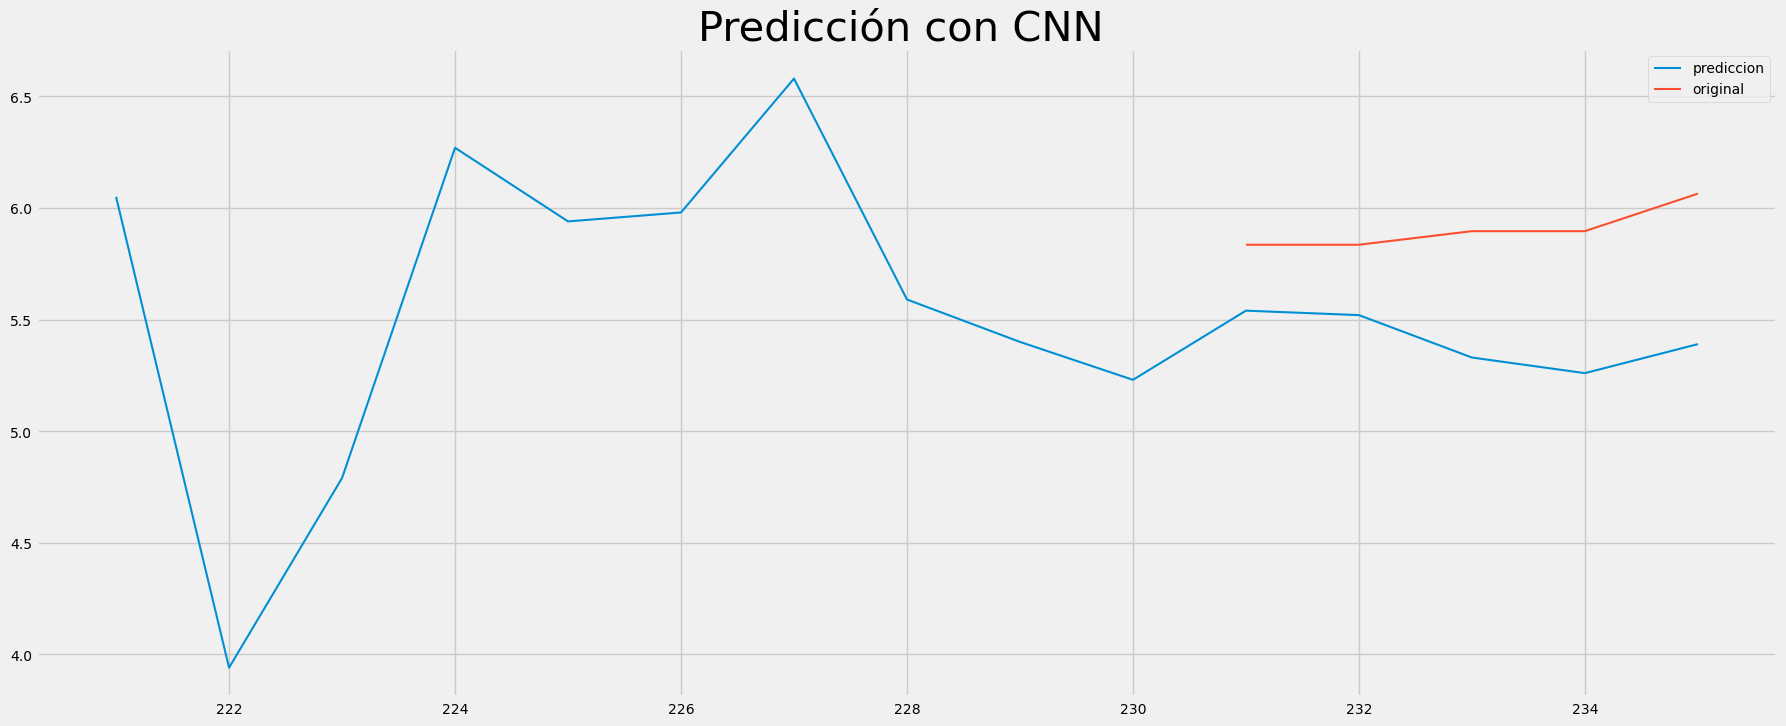

In [32]:
predicciones["pred"] = ypred

r2 = r2_score(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)

predicciones_fecha = X_test.copy()
predicciones_fecha["eto"] = predicciones["pred"].values

fig, ax = plt.subplots(figsize=(20, 8))
plt.title("Predicción con CNN ", fontsize=30);
#df_train['temperatura'].plot(ax=ax, label='train')
datos["eto"].tail(10+entreno).plot(ax=ax, label='prediccion')
predicciones_fecha["eto"].plot(ax=ax, label='original')
ax.legend();

evaluacion_metrica(y_true = y_test,y_pred = predicciones_fecha["eto"])

### Esta es una red recurrente en cascada "return_sequences=True"

#### Aquí con todos los datos

In [33]:
# Preparar los datos para la RNN
X = []
y = []
for i in range(len(X_train) - 2):
    X.append(X_train[i:i+2])
    y.append(y_train[i+2])

X = np.array(X_train)
y = np.array(y_train)

# Crear una RNN de 5 capas
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(4, return_sequences=True, input_shape=(7, 1)),  # Capa RNN 1
    tf.keras.layers.SimpleRNN(4, return_sequences=True),  # Capa RNN 2
    tf.keras.layers.SimpleRNN(4, return_sequences=True),  # Capa RNN 3
    tf.keras.layers.SimpleRNN(4, return_sequences=True),  # Capa RNN 4
    tf.keras.layers.SimpleRNN(4),  # Capa RNN 5
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar la RNN
model.fit(X, y, epochs=1000, verbose=0)

# Realizar predicciones
predicted = model.predict(X)

# Imprimir las predicciones
print("Predicciones:")
print(predicted)

8/8 [==============================] - 0s 2ms/step
Predicciones:
[[1.3114865]
 [1.3114865]
 [1.3045924]
 [1.3045924]
 [2.0346963]
 [2.0346963]
 [1.9541864]
 [1.9541864]
 [3.149803 ]
 [3.149803 ]
 [2.0141847]
 [2.0141847]
 [2.1271243]
 [2.1271243]
 [4.5913773]
 [4.5913773]
 [3.5398936]
 [3.5398936]
 [1.9467807]
 [1.9467807]
 [2.3993022]
 [2.3993022]
 [1.9164476]
 [1.94736  ]
 [1.94736  ]
 [1.9347897]
 [1.9347897]
 [1.9122663]
 [1.9122663]
 [1.881896 ]
 [1.8818958]
 [1.9244323]
 [1.9244325]
 [1.9228249]
 [1.9228249]
 [5.0406313]
 [5.0406313]
 [3.3012004]
 [3.3012004]
 [1.9348581]
 [1.9348581]
 [3.902558 ]
 [3.902558 ]
 [3.8758733]
 [3.8758733]
 [1.9203901]
 [1.9203901]
 [2.915016 ]
 [2.915016 ]
 [5.3714547]
 [5.3714547]
 [4.0629277]
 [4.0629277]
 [3.600105 ]
 [3.600105 ]
 [5.27746  ]
 [5.27746  ]
 [5.415753 ]
 [5.415753 ]
 [5.419663 ]
 [5.419663 ]
 [5.394152 ]
 [5.394152 ]
 [5.5028224]
 [5.5028224]
 [5.2801166]
 [5.2801166]
 [5.420919 ]
 [5.420919 ]
 [4.4384627]
 [4.4384627]
 [5.4050756]

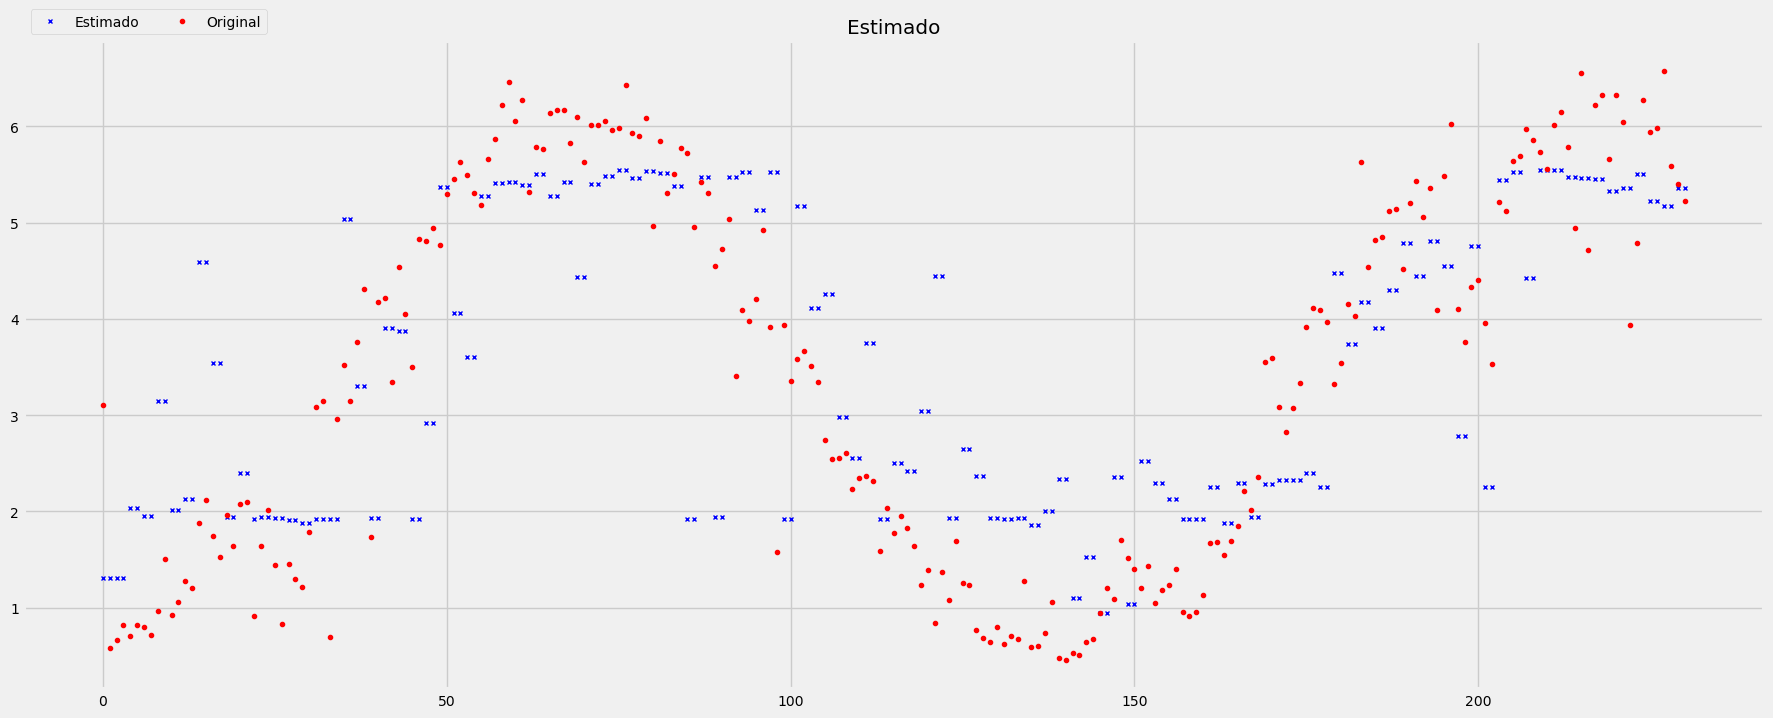

In [34]:
plt.figure(figsize=(20,8))

#plt.title('Y_predict')
l = plt.plot(predicted, 'o', color='blue', label="Estimado", marker='x')
plt.setp(l, markersize=3)

plt.title('Estimado')
q = plt.plot(y_train, 'o', color='red', label="Original")
plt.setp(q, markersize=3)
category_names = ['Estimado', 'Original']
legend = plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
plt.show()

#### Aquí con los datos de train y test

In [39]:
X = np.array(X_train)
y = np.array(y_train)
X_test = np.array(X_test)

# Crear una RNN de 5 capas
model_RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(4, return_sequences=True, input_shape=(7, 1)),  # Capa RNN 1
    tf.keras.layers.SimpleRNN(4, return_sequences=True),  # Capa RNN 2
    tf.keras.layers.SimpleRNN(4, return_sequences=True),  # Capa RNN 3
    tf.keras.layers.SimpleRNN(4, return_sequences=True),  # Capa RNN 4
    tf.keras.layers.SimpleRNN(4),  # Capa RNN 5
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona
])

# Compilar el modelo
model_RNN.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar la RNN
model_RNN.fit(X, y, epochs=1000, verbose=0)

# Realizar predicciones
predicted = model_RNN.predict(X_test)

# Imprimir las predicciones
print("Predicciones:")
print(predicted)

1/1 [==============================] - 0s 14ms/step
Predicciones:
[[5.2974563]
 [5.2974563]
 [5.4893146]
 [5.4893146]
 [5.321808 ]]


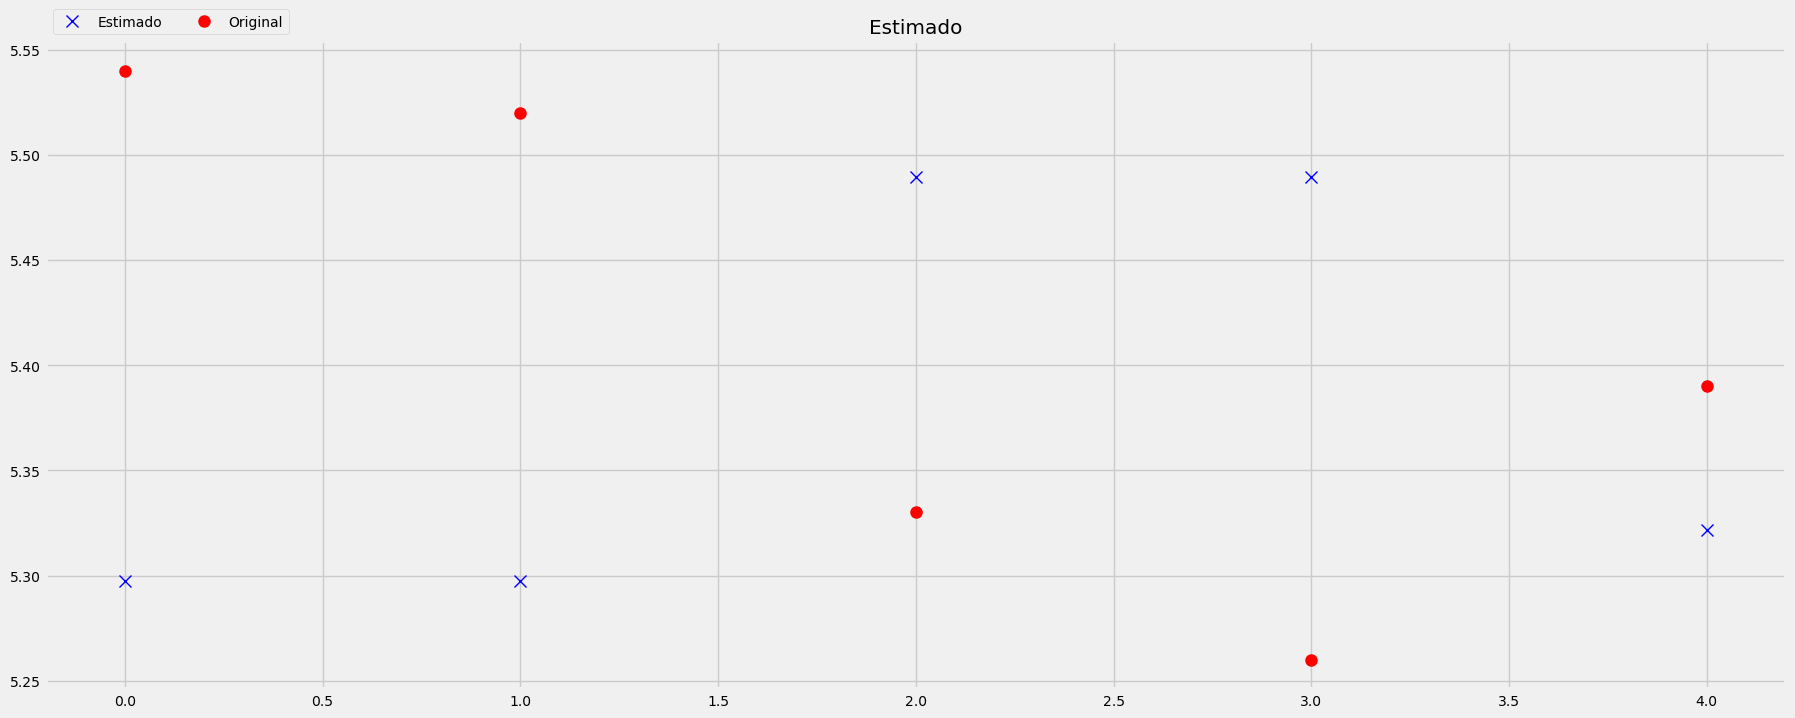

In [40]:
plt.figure(figsize=(20,8))

#plt.title('Y_predict')
l = plt.plot(predicted, 'o', color='blue', label="Estimado", marker='x')
plt.setp(l, markersize=8)

plt.title('Estimado')
q = plt.plot(y_test.values, 'o', color='red', label="Original")
plt.setp(q, markersize=8)
category_names = ['Estimado', 'Original']
legend = plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
plt.show()

In [37]:
print(y_test)

231    5.54
232    5.52
233    5.33
234    5.26
235    5.39
Name: eto, dtype: float64


In [41]:
evaluacion_metrica(y_true = y_test,y_pred = predicted)

Evaluation metric results:-
MSE: 0.03819392781254745
MAE: 0.1843817443847655
RMSE: 0.19543266823268685
MAPE: 2.17381227249078
R2: -2.2767611369721577



In [56]:
pip install --upgrade tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for ml-dtypes==0.2.0 from https://files.pythonhosted.org/packages/08/89/c727fde1a3d12586e0b8c01abf53754707d76beaa9987640e70807d4545f/ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorboard<2.15,>=2.14 from https://files.pythonhosted.org/packages/73/a2/66ed644f6ed1562e0285fcd959af17670ea313c8f331c46f79ee77187eb9/tensorboard-2.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-estimator<2.15,>=2.14.0 from https://files.pythonhosted.org/

In [60]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def build_rnn(num_units=4):
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(num_units, return_sequences=True, input_shape=(2, 5)),
        tf.keras.layers.SimpleRNN(num_units, return_sequences=True),
        tf.keras.layers.SimpleRNN(num_units, return_sequences=True),
        tf.keras.layers.SimpleRNN(num_units, return_sequences=True),
        tf.keras.layers.SimpleRNN(num_units),
        tf.keras.layers.Dense(5)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Preparar los datos para la RNN
X = np.array(X_train)
y = np.array(y_train)
X_test = np.array(X_test)

# Crear un modelo KerasRegressor para usar con GridSearchCV
rnn_model = KerasRegressor(build_fn=build_rnn)

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'num_units': [4, 8, 16, 32]  # Prueba diferentes valores para el número de unidades en SimpleRNN
}

# Realizar una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=rnn_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ........................................num_units=4; total time=   0.1s
[CV] END ........................................num_units=4; total time=   0.1s
[CV] END ........................................num_units=4; total time=   0.1s
[CV] END ........................................num_units=8; total time=   0.1s
[CV] END ........................................num_units=8; total time=   0.1s
[CV] END ........................................num_units=8; total time=   0.1s
[CV] END .......................................num_units=16; total time=   0.1s
[CV] END .......................................num_units=16; total time=   0.1s
[CV] END .......................................num_units=16; total time=   0.1s
[CV] END .......................................num_units=32; total time=   0.1s
[CV] END .......................................num_units=32; total time=   0.1s
[CV] END .......................................n

ValueError: 
All the 12 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Martinejo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Martinejo\anaconda3\Lib\site-packages\keras\wrappers\scikit_learn.py", line 167, in fit
AttributeError: module 'keras.losses' has no attribute 'is_categorical_crossentropy'
